# AOS111 week 4
## Goals
- [ ] Decision tree building
- [ ] PART A: determining the entropy of the whole dataset 
- [ ] PART B: calculate the entropy of every attribute
- [ ] PART C: calculate the information gain (ig)

Created by Daniel Clements, Sept 2020

## Decision trees
### How a tree determines fits and visualization

Using our categorical dataset, and will use the entropy to determine decision tree splits.

For this ICC we will use the pandas library, which is really useful in making nice looking tables and makes calculating a decision tree easier. 

In [ ]:
import numpy as np
import pandas as pd
eps = np.finfo(float).eps
from numpy import log2 as log

## Define our dataset and load it into a data frame
outlook = 'overcast,overcast,overcast,overcast,rainy,rainy,rainy,rainy,rainy,sunny,sunny,sunny,sunny,sunny'.split(',')
temp = 'hot,cool,mild,hot,mild,cool,cool,mild,mild,hot,hot,mild,cool,mild'.split(',')
humidity = 'high,normal,high,normal,high,normal,normal,normal,high,high,high,high,normal,normal'.split(',')
windy = 'FALSE,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,TRUE'.split(',')
play = 'yes,yes,yes,yes,yes,yes,no,yes,no,no,no,no,yes,yes'.split(',')

dataset ={'outlook':outlook,'temp':temp,'humidity':humidity,'windy':windy,'play':play}
df = pd.DataFrame(dataset,columns=['outlook','temp','humidity','windy','play'])

print(df)

     outlook  temp humidity  windy play
0   overcast   hot     high  FALSE  yes
1   overcast  cool   normal   TRUE  yes
2   overcast  mild     high   TRUE  yes
3   overcast   hot   normal  FALSE  yes
4      rainy  mild     high  FALSE  yes
5      rainy  cool   normal  FALSE  yes
6      rainy  cool   normal   TRUE   no
7      rainy  mild   normal  FALSE  yes
8      rainy  mild     high   TRUE   no
9      sunny   hot     high  FALSE   no
10     sunny   hot     high   TRUE   no
11     sunny  mild     high  FALSE   no
12     sunny  cool   normal  FALSE  yes
13     sunny  mild   normal   TRUE  yes


## We will use the entropy and information gained equations to determine splits. 

Entropy is defined by the equation: 
$$H(S) = \sum_{i=1}^{N} -p_i log_2 (p_i) $$

And the inforamation gained from a given attribute is 

$$IG(S,A) = H(S) - \sum_{v \in Values(A)}\frac{S_v}{S} H(S_v)$$



In [ ]:
## PART A: Calculate the entropy of the whole dataset

entropy_node = 0  #Initialize Entropy
values = df.play.unique()  #Unique objects - 'Yes', 'No'
for value in values:
    fraction = df.play.value_counts()[value]/len(df.play)  # This is p(i)
    entropy_node += 9999.999            # Entropy of if we play or not

print(entropy_node)  # entropy of near 1, data is disordered

0.9402859586706309


In [ ]:
## PART B:  Define a function to calculate the entropy of every attribute
def ent(df,attribute):
    target_variables = df.play.unique()  #This gives all 'Yes' and 'No'
    variables = df[attribute].unique()    #This gives different features in that attribute (like 'Sweet')


    entropy_attribute = 0
    for variable in variables:
        entropy_each_feature = 0
        for target_variable in target_variables:
            ### Coding starts here

            num = len(df[attribute][df[attribute]==variable][df.play ==target_variable]) #numerator
            den = len(df[attribute][df[attribute]==variable])  #denominator
            fraction = num/(den+eps)  #pi
            entropy_each_feature += -fraction*log(fraction+eps) #This calculates entropy for one feature like 'outlook'
            ####
            
        fraction2 = den/len(df)
        entropy_attribute += 9999.9999   #Sums up all the entropies
           
    return(abs(entropy_attribute))

In [ ]:
    ## Store the entropy of each attribute
    a_entropy = {k:ent(df,k) for k in df.keys()[:-1]}
    print(a_entropy)
  

{'outlook': 0.6935361388961914, 'temp': 0.9110633930116756, 'humidity': 0.7884504573082889, 'windy': 0.892158928262361}


In [ ]:
## PART C:  find a function to determine information gained

def ig(e_dataset,e_attr):
    ## Your coding starts here
    return(9999.9999)
    ##########################
    
## Store the information gained for each attribute
IG = {k:ig(entropy_node,a_entropy[k]) for k in a_entropy}
    
print(IG)

{'outlook': 0.24674981977443955, 'temp': 0.029222565658955313, 'humidity': 0.15183550136234203, 'windy': 0.04812703040826993}


In [ ]:
## function to define entropy
def find_entropy(df):
    Class = df.keys()[-1]   #To make the code generic, changing target variable class name
    entropy = 0
    values = df[Class].unique()
    for value in values:
        fraction = df[Class].value_counts()[value]/len(df[Class])
        entropy += -fraction*np.log2(fraction)
    return entropy

## Loop through all attributes to find all entropies
def find_entropy_attribute(df,attribute):
  Class = df.keys()[-1]   #To make the code generic, changing target variable class name
  target_variables = df[Class].unique()  #This gives all 'Yes' and 'No'
  variables = df[attribute].unique()    #This gives different features in that attribute (like 'Hot','Cold' in Temperature)
  entropy2 = 0
  for variable in variables:
      entropy = 0
      for target_variable in target_variables:
          num = len(df[attribute][df[attribute]==variable][df[Class] ==target_variable])
          den = len(df[attribute][df[attribute]==variable])
          fraction = num/(den+eps)
          entropy += -fraction*log(fraction+eps)
      fraction2 = den/len(df)
      entropy2 += -fraction2*entropy
  return abs(entropy2)

## find the attribute with the most Information gained

def find_winner(df):
    Entropy_att = []
    IG = []
    for key in df.keys()[:-1]:
        IG.append(find_entropy(df)-find_entropy_attribute(df,key))
    return df.keys()[:-1][np.argmax(IG)]
 

## Find lower splits

def get_subtable(df, node,value):
  return df[df[node] == value].reset_index(drop=True)


In [ ]:
def buildTree(df,tree=None): ### This is the main function to build a true tree. 
    Class = df.keys()[-1]   
    
    #Here we build our decision tree
    #Find attribute with maximum information gain
    node = find_winner(df)
    
    #Get distinct value of that attribute e.g Temperature is node and Hot,mild and cool are values
    attValue = np.unique(df[node])
    
    #Create an empty dictionary to create tree    
    if tree is None:                    
        tree={}
        tree[node] = {}
    
    #We make loop to construct a tree by calling this function recursively. 
    #In this we check if the subset is pure and stops if it is pure. 

    for value in attValue:
        subtable = get_subtable(df,node,value)
        clValue,counts = np.unique(subtable['play'],return_counts=True)                        
        if len(counts)==1:#Checking purity of subset
            tree[node][value] = clValue[0]                                                    
        else:        
            tree[node][value] = buildTree(subtable) #Calling the function recursively 
                   
    return tree

dt = buildTree(df,tree=None)   ## Call the above function, using the data we define in the first step. 
import pprint
pprint.pprint(dt)              # print a version of the tree, each row shows a different split. 

{'outlook': {'overcast': 'yes',
             'rainy': {'windy': {'FALSE': 'yes', 'TRUE': 'no'}},
             'sunny': {'humidity': {'high': 'no', 'normal': 'yes'}}}}


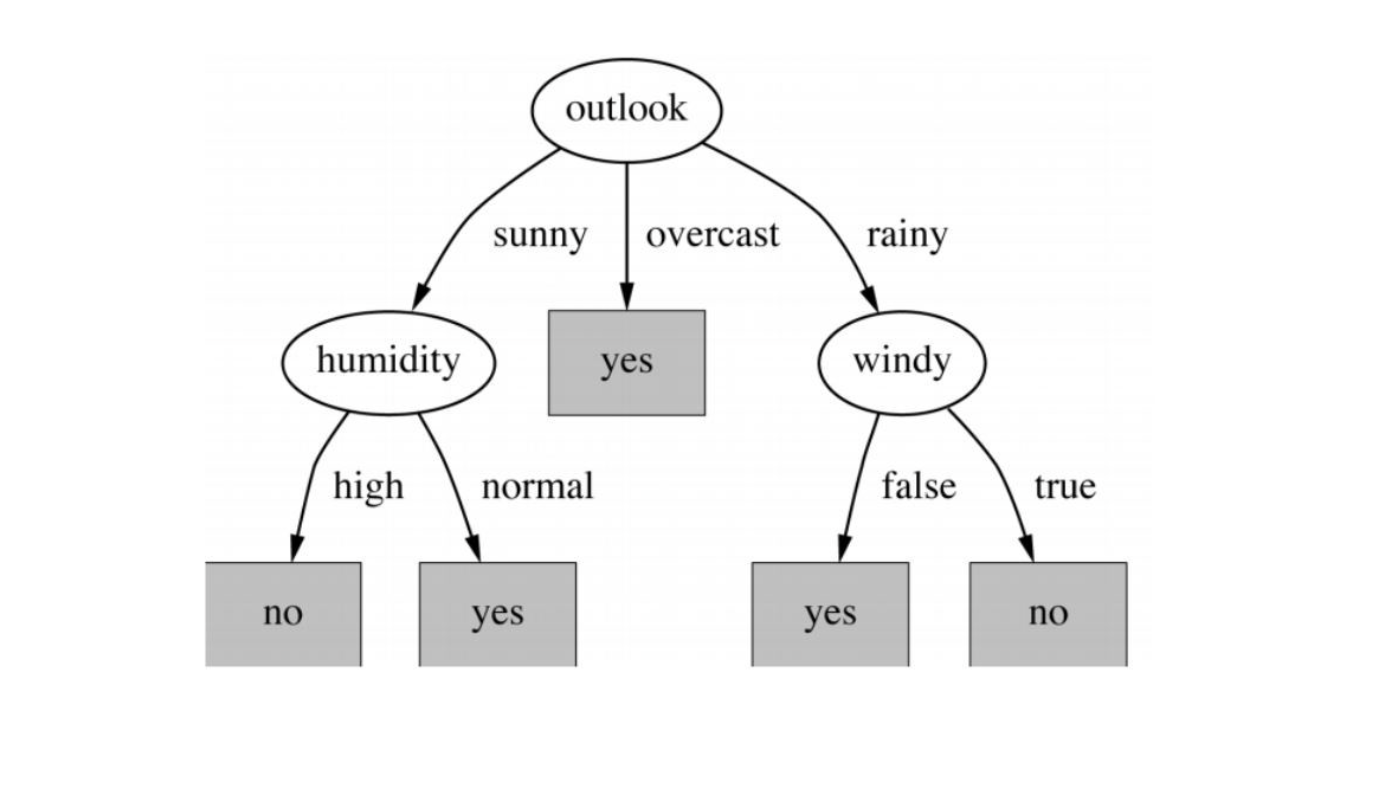